<a href="https://colab.research.google.com/github/Rishik-J/QuantFinance/blob/main/QDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program to plot the IV of an option's chain at a certain expiraiton date

## Importing Libraries and reading in data

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import math

In [ ]:
# Reading in data
data = pd.read_csv("spydec6.csv", on_bad_lines='skip', parse_dates=True, index_col=0)
data.rename(columns = {'Bid.1':'Bid1', 'Ask.1':'Ask1'}, inplace = True)
len(data.index)

1756

## Cleaning and pre-processing data

In [ ]:
# Select the expiration data you want to plot the Q distribution for
data = data.loc['2022-12-8']

# Remove irrelavent columns
columns = ['Bid', 'Ask', 'Strike', 'Bid1', 'Ask1']
data = data[columns]

# Remove all rows that have a $0 bid or ask price 
data = data[data.Bid1 > 0]
data = data[data.Bid > 0]
data = data[data.Ask > 0]
data = data[data.Ask1 > 0]
data.head()

,Bid,Ask,Strike,Bid1,Ask1
Expiration Date,,,,,
2022-12-08,55.46,55.67,343.0,0.01,0.02
2022-12-08,54.46,54.65,344.0,0.01,0.02
2022-12-08,53.46,53.65,345.0,0.01,0.02
2022-12-08,52.46,52.66,346.0,0.01,0.02
2022-12-08,51.48,51.68,347.0,0.01,0.02


### Adding the call mid and put mid columns

In [ ]:
def mid(bid, ask):
  return (bid+ask)/2

callmid = []
putmid = []
for index, row in data.iterrows():
  callmid.append(mid(row['Bid'], row['Ask']))
  putmid.append(mid(row['Bid1'], row['Ask1']))

data['callmid'] = callmid
data['Putmid'] = putmid

data.head()

,Bid,Ask,Strike,Bid1,Ask1,callmid,Putmid
Expiration Date,,,,,,,
2022-12-08,55.46,55.67,343.0,0.01,0.02,55.565,0.015
2022-12-08,54.46,54.65,344.0,0.01,0.02,54.555,0.015
2022-12-08,53.46,53.65,345.0,0.01,0.02,53.555,0.015
2022-12-08,52.46,52.66,346.0,0.01,0.02,52.560,0.015
2022-12-08,51.48,51.68,347.0,0.01,0.02,51.580,0.015


### Adding the delta column (difference is strike pricese) 

In [ ]:
difference = data['Strike'].diff()
data['delta'] = difference
data.head()

,Bid,Ask,Strike,Bid1,Ask1,callmid,Putmid,delta
Expiration Date,,,,,,,,
2022-12-08,55.46,55.67,343.0,0.01,0.02,55.565,0.015,NaN
2022-12-08,54.46,54.65,344.0,0.01,0.02,54.555,0.015,1.0
2022-12-08,53.46,53.65,345.0,0.01,0.02,53.555,0.015,1.0
2022-12-08,52.46,52.66,346.0,0.01,0.02,52.560,0.015,1.0
2022-12-08,51.48,51.68,347.0,0.01,0.02,51.580,0.015,1.0


### Adding the butterfly calls and puts

In [ ]:
calls = []
puts = []
for i in range (len(data.index)-2):
  calls.append(data.iloc[i, 5]-2*data.iloc[i+1, 5]+data.iloc[i+2, 5])
  puts.append(data.iloc[i, 6]-2*data.iloc[i+1, 6]+data.iloc[i+2, 6])

calls.append(data.iloc[len(data.index)-2, 5]-2*data.iloc[len(data.index)-1, 5])
calls.append(0)
puts.append(data.iloc[len(data.index)-2, 6]-2*data.iloc[len(data.index)-1, 6])
puts.append(0)
data['ButterflyCalls'] = calls
data['ButterflyPuts'] = puts

In [ ]:
data.tail()

,Bid,Ask,Strike,Bid1,Ask1,callmid,Putmid,delta,ButterflyCalls,ButterflyPuts
Expiration Date,,,,,,,,,,
2022-12-08,0.03,0.04,414.0,15.51,15.69,0.035,15.600,1.0,0.000,3.552714e-15
2022-12-08,0.02,0.03,415.0,16.50,16.69,0.025,16.595,1.0,0.010,5.000000e-03
2022-12-08,0.01,0.02,416.0,17.50,17.68,0.015,17.590,1.0,0.000,0.000000e+00
2022-12-08,0.01,0.02,417.0,18.50,18.68,0.015,18.590,1.0,-0.015,-2.059000e+01
2022-12-08,0.01,0.02,418.0,19.50,19.68,0.015,19.590,1.0,0.000,0.000000e+00


### Adding the IV of each contract to the dataframe

In [ ]:
def addQToDataframe(data, strike):
  q = []
  for index, row in data.iterrows():
    if(row['Strike'] < strike):
      q.append((row['ButterflyPuts']/math.pow(row['delta'], 2)) * row['delta'])
    else:
      q.append((row['ButterflyCalls']/math.pow(row['delta'], 2)) * row['delta'])
  data['Q'] = q
  return data

In [ ]:
data = addQToDataframe(data, 396)

In [ ]:
data['Q'].sum()

1.0000000000000007

### Plot the Q Distribution

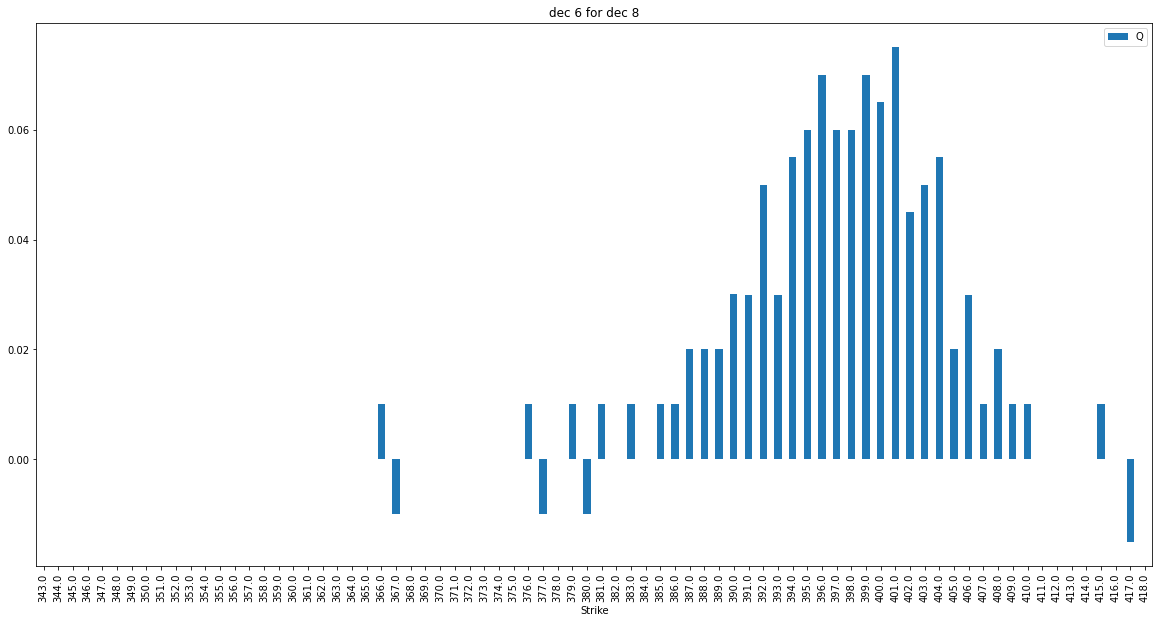

In [ ]:
data.plot(x='Strike', y='Q', style='o', kind='bar', figsize=(20, 10), title='dec 6 for dec 8')

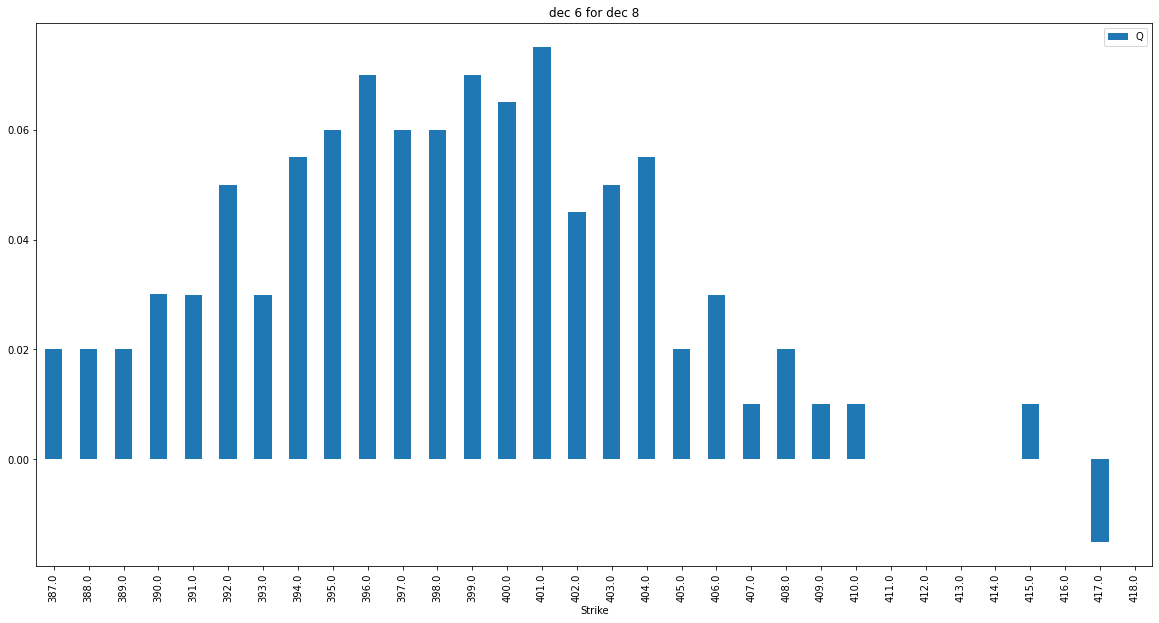

In [ ]:
data.loc[data['Strike'] >= 387].plot(x='Strike', y='Q', style='o', kind='bar', figsize=(20, 10), title='dec 6 for dec 8')

# Using Stochastic calculus to Predict the range of a stock price

In [2]:
import scipy.stats as st
import numpy as np
import pandas as pd

In [53]:
spy = pd.read_csv('SPY_price.csv')
spy['Daily returns'] = spy['Close'].pct_change()
spy = spy[['Close', 'Daily returns']]
spy['Daily returns'].std()

0.015225338384743844

In [61]:
spy = pd.read_csv('SPY_price.csv')
spy['Daily returns'] = spy['Close'].pct_change()
spy = spy[['Close', 'Daily returns']]
spy['Daily returns'].mean()
# Import necessary libraries
import matplotlib.pyplot as plt

# Set the start and end prices for the range we are interested in
start_price = 394
end_price = 396

# Set the time horizon (in days)
time_horizon = 5

# Calculate the drift and diffusion parameters of the stock's return process
# Calculate the mean and standard deviation of the daily returns
mu = spy['Daily returns'].mean()
sigma = spy['Daily returns'].std()

# Use the Euler-Maruyama method to simulate the stock's price over the time horizon
dt = 1/252 # Set the time step (assuming 252 trading days per year)
n_sims = 1000 # Set the number of simulations to run

# Initialize the simulated prices array
sim_prices = np.zeros((time_horizon+1, n_sims))

# Set the initial price for each simulation
sim_prices[0] = 393

# Simulate the stock's price using the Euler-Maruyama method
for t in range(1, time_horizon+1):
    dW = np.random.normal(0, np.sqrt(dt), n_sims)
    sim_prices[t] = sim_prices[t-1] + mu*sim_prices[t-1]*dt + sigma*sim_prices[t-1]*dW

# Calculate the probability that the stock's price is within the desired range
probability = np.mean((sim_prices[-1] >= start_price) & (sim_prices[-1] <= end_price))

# Print the result
print("The probability that the stock price will be within [{}, {}] in {} days is {:.2f}".format(start_price, end_price, time_horizon, probability))

The probability that the stock price will be within [394, 396] in 5 days is 0.12


## Using Black-Scholes to simulate prices

In [62]:
# Initialize the simulated prices array
sim_prices = np.zeros((time_horizon+1, n_sims))

# Set the initial price for each simulation
sim_prices[0] = 393

# Simulate the stock's price using the Black-Scholes model
for t in range(1, time_horizon+1):
    dW = np.random.normal(0, np.sqrt(dt), n_sims)
    sim_prices[t] = sim_prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# Count the number of simulations in which the stock's price is within the desired range
num_in_range = np.sum((sim_prices[-1] >= start_price) & (sim_prices[-1] <= end_price))

# Calculate the probability that the stock's price is within the desired range
probability = num_in_range / n_sims

# Print the result
print("The probability that the stock price will be within [{}, {}] in {} days is {:.2f}".format(start_price, end_price, time_horizon, probability))

The probability that the stock price will be within [394, 396] in 5 days is 0.11
